<a href="https://colab.research.google.com/github/navruzbek1/Datasets/blob/main/%5Cmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CUSTOMER CHURN (mijozlarning ketish yoki qolish ehtimolini aniqlaymiz)**

Mijozning noroziligini (customer churn) aniqlash
Biznesda eng ko'p uchraydigan muammolardan biri. Mijozning kayfiyatini aniqlash.

Agar biznes egasi mijoz qaytmasligini, maxsulot yoki xizmatdan qayta foydanalmasligini oldindan bashorat qila olsa, mijozni ushlab qolish uchun, uning fikrini o'zgartirish uchun harakat qilishi mumkin.

Ushbu amaliyotda biz online do'kon xaridorlari ma'lumotlarini tahlil qilish orqali mijozning qolish-qolmasligini bashorat qilamiz.

*Bir qancha klassifikatsiya modellaridan foydalanib masalaga yechim topamiz*

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn import metrics
%matplotlib inline

faylni ochib olamiz

In [29]:
url="https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"

df = pd.read_excel(url, sheet_name="E Comm")

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [30]:
df.shape

(5630, 20)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [10]:
df.isnull().sum().sum()/(len(df))*100

32.96625222024866

([<matplotlib.patches.Wedge at 0x7f470ff1de90>,
 [Text(-0.9627634275850803, 0.5320588148923278, 'ketmaganlar'),
  Text(1.1378112940735372, -0.628796834501179, 'ketganlar')])

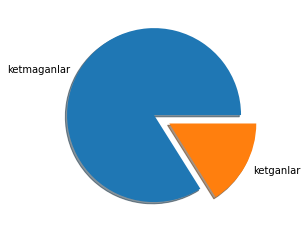

In [142]:
churn = index["Churn"].value_counts()
sre = [0,0.2]
plt.pie(churn,labels=["ketmaganlar","ketganlar"],explode=sre,shadow=True)

In [134]:
churn[0]

4246

In [13]:
df.corrwith(df["Churn"]).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

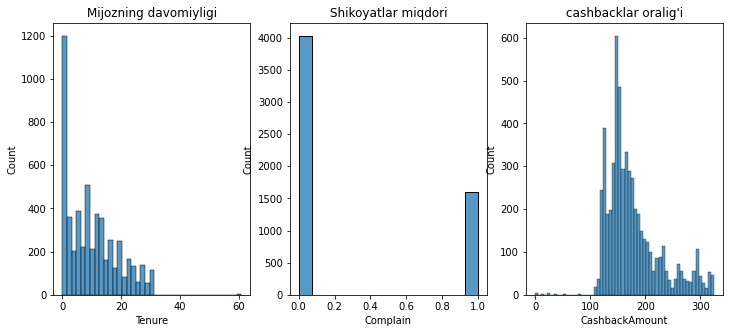

In [48]:
fig, axis = plt.subplots(1,3,figsize=(12,5))

sns.histplot(data=df,x=df["Tenure"],ax=axis[0])
axis[0].set_title("Mijozning davomiyligi")

sns.histplot(data=df,x="Complain",ax=axis[1])
axis[1].set_title("Shikoyatlar miqdori")

sns.histplot(data=df,x=df["CashbackAmount"],ax=axis[2])
axis[2].set_title("cashbacklar oralig'i")
plt.show()

In [44]:
df["Complain"].unique()

array([1, 0])

In [62]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [52]:
df.corrwith(df["Churn"]).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

In [54]:
index = pd.get_dummies(df[["Churn","Tenure","Complain","DaySinceLastOrder","CashbackAmount","Gender","MaritalStatus"]])
index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Churn                   5630 non-null   int64  
 1   Tenure                  5366 non-null   float64
 2   Complain                5630 non-null   int64  
 3   DaySinceLastOrder       5323 non-null   float64
 4   CashbackAmount          5630 non-null   float64
 5   Gender_Female           5630 non-null   uint8  
 6   Gender_Male             5630 non-null   uint8  
 7   MaritalStatus_Divorced  5630 non-null   uint8  
 8   MaritalStatus_Married   5630 non-null   uint8  
 9   MaritalStatus_Single    5630 non-null   uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 247.5 KB


In [60]:
index.dropna(inplace=True)

In [57]:
index.corrwith(df["Churn"]).abs().sort_values(ascending=False)

Churn                     1.000000
Tenure                    0.349408
Complain                  0.250188
MaritalStatus_Single      0.180847
DaySinceLastOrder         0.160757
CashbackAmount            0.154118
MaritalStatus_Married     0.151024
Gender_Female             0.029264
Gender_Male               0.029264
MaritalStatus_Divorced    0.024934
dtype: float64

In [64]:
scaler = StandardScaler()
x = scaler.fit_transform(index.drop("Churn",axis=1).values)
y = index["Churn"]

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=21,train_size=0.8)

# Logistic Regression

model aniqligi:87.84584980237155%
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       860
           1       0.68      0.36      0.47       152

    accuracy                           0.88      1012
   macro avg       0.79      0.66      0.70      1012
weighted avg       0.86      0.88      0.86      1012



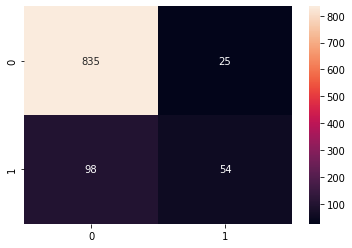

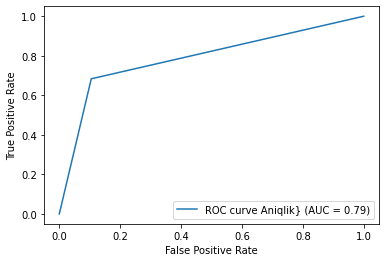

In [108]:
LO_model = LogisticRegression()
LO_model.fit(x_train,y_train)
predict = LO_model.predict(x_test)
## confusion matrix
sns.heatmap((metrics.confusion_matrix(y_test,predict)),annot=True,fmt="g",)
print(f"model aniqligi:{(metrics.accuracy_score(predict,y_test))*100}%")
##classification report
print(metrics.classification_report(y_test,predict))
## 
a,b,c = metrics.roc_curve(predict,y_test)
roc = metrics.auc(a,b)
display = metrics.RocCurveDisplay(fpr=a,tpr=b,roc_auc=roc,estimator_name='ROC curve Aniqlik}')
display.plot()
plt.show()

# Support Verctor machine



 model aniqligi:0.8695652173913043


              precision    recall  f1-score   support

           0       0.97      0.89      0.93       944
           1       0.29      0.65      0.40        68

    accuracy                           0.87      1012
   macro avg       0.63      0.77      0.66      1012
weighted avg       0.93      0.87      0.89      1012



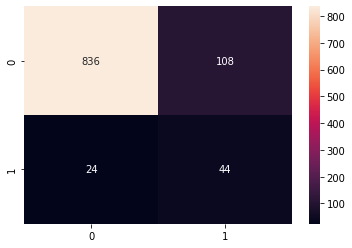

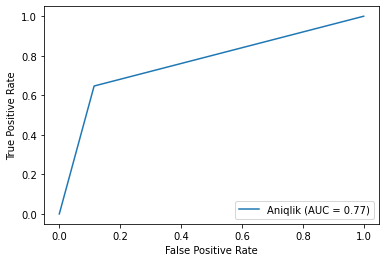

In [107]:
svm_model = SVC()
svm_model.fit(x_train,y_train)

predict = svm_model.predict(x_test)
print(f'\n\n model aniqligi:{metrics.accuracy_score(predict,y_test)}\n\n')

## classification report
print(metrics.classification_report(predict,y_test))

## confusion_matrix
sns.heatmap(confusion_matrix(predict,y_test),annot=True,fmt='g')
plt.show()

## roc curve
a,b,c = metrics.roc_curve(predict,y_test)
roc = metrics.auc(a,b)
display = metrics.RocCurveDisplay(fpr=a,tpr=b,roc_auc = roc,estimator_name="Aniqlik")
display.plot()
plt.show()

# DECISION TREE CLASSIFIER model

model aniqligi: 0.9525691699604744%
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       868
           1       0.82      0.86      0.84       144

    accuracy                           0.95      1012
   macro avg       0.90      0.91      0.91      1012
weighted avg       0.95      0.95      0.95      1012



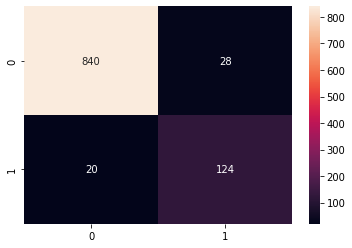

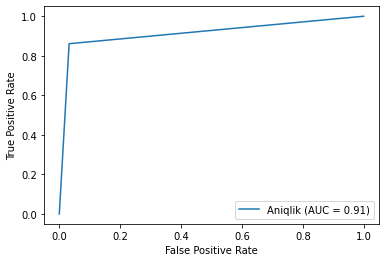

In [111]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

predict = tree_model.predict(x_test)

#model aniqligi
print(f'model aniqligi: {metrics.accuracy_score(predict,y_test)}%')

##classificationreplort
print(metrics.classification_report(predict,y_test))

## confusion matrix
sns.heatmap(metrics.confusion_matrix(predict,y_test),annot=True,fmt="g")
plt.show()

## roc curve
a,b,c = metrics.roc_curve(predict,y_test)
roc = metrics.auc(a,b)
display = metrics.RocCurveDisplay(fpr=a,tpr=b,roc_auc = roc,estimator_name="Aniqlik")
display.plot()
plt.show()

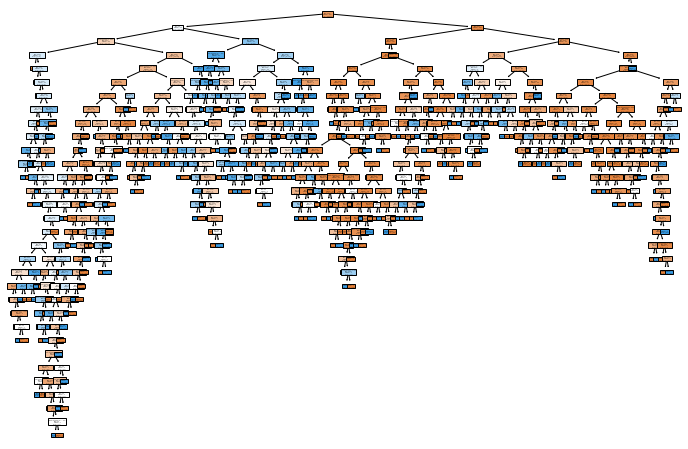

In [114]:
cols = index.drop("Churn",axis=1).columns
plt.figure(figsize=(12,8))
tree.plot_tree(tree_model,feature_names=cols,filled=True)
plt.show()

shu o'rinda eng yaxshi k ni ham topib ketamiz

In [120]:
grd = GridSearchCV(tree_model,{"max_depth":np.arange(1,25)},cv=5)
grd.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [121]:
grd.best_params_


{'max_depth': 24}

In [122]:
#hulosa qilishimiz mumkin demak max_depth daraxt uzunligi 24 ga teng bo'lsa modelimiz max aniqlikka erishadi ekan

# RandomForestClassifier

model aniqligi: 0.9565217391304348%
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       870
           1       0.82      0.88      0.85       142

    accuracy                           0.96      1012
   macro avg       0.90      0.92      0.91      1012
weighted avg       0.96      0.96      0.96      1012



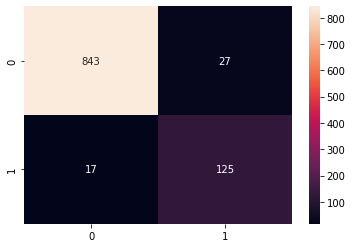

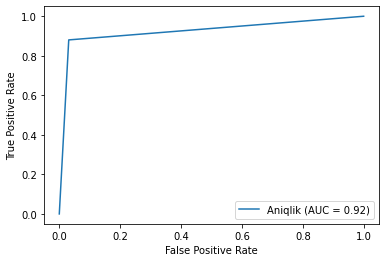

In [123]:
RF_model = RandomForestClassifier()
RF_model = RF_model.fit(x_train,y_train)
predict = RF_model.predict(x_test)

#model aniqligi
print(f'model aniqligi: {metrics.accuracy_score(predict,y_test)}%')

##classificationreplort
print(metrics.classification_report(predict,y_test))

## confusion matrix
sns.heatmap(metrics.confusion_matrix(predict,y_test),annot=True,fmt="g")
plt.show()

## roc curve
a,b,c = metrics.roc_curve(predict,y_test)
roc = metrics.auc(a,b)
display = metrics.RocCurveDisplay(fpr=a,tpr=b,roc_auc = roc,estimator_name="Aniqlik")
display.plot()
plt.show()



#  XGBCLASSIFIER



model aniqligi: 0.9031620553359684%
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       904
           1       0.53      0.75      0.62       108

    accuracy                           0.90      1012
   macro avg       0.75      0.84      0.78      1012
weighted avg       0.92      0.90      0.91      1012



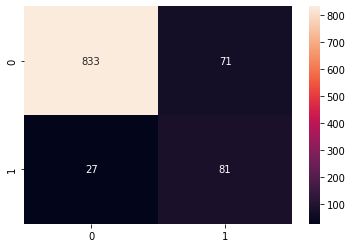

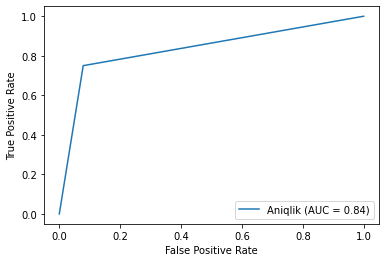

In [126]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)
predict = xgb_model.predict(x_test)

#model aniqligi
print(f'model aniqligi: {metrics.accuracy_score(predict,y_test)}%')

##classificationreplort
print(metrics.classification_report(predict,y_test))

## confusion matrix
sns.heatmap(metrics.confusion_matrix(predict,y_test),annot=True,fmt="g")
plt.show()

## roc curve
a,b,c = metrics.roc_curve(predict,y_test)
roc = metrics.auc(a,b)
display = metrics.RocCurveDisplay(fpr=a,tpr=b,roc_auc = roc,estimator_name="Aniqlik")
display.plot()
plt.show()

[github](https://github.com/navruzbek1